In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/jacobgil/pytorch-grad-cam.git

Cloning into 'pytorch-grad-cam'...
remote: Enumerating objects: 1115, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 1115 (delta 4), reused 5 (delta 1), pack-reused 1097
Receiving objects: 100% (1115/1115), 110.17 MiB | 27.74 MiB/s, done.
Resolving deltas: 100% (613/613), done.


In [ ]:
import sys
sys.path.append('/content/drive/pytorch-grad-cam')
sys.path.append('/content/drive/pytorch-grad-cam/pytorch-grad-cam')

In [ ]:
%cd pytorch-grad-cam

/content/pytorch-grad-cam


In [ ]:
!pip install -r requirements.txt
!pip install pytorch-lightning
!pip install torch-lr-finder
!pip install grad-cam
!pip install lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.7/727.7 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 16.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.8-py3-none-any.whl size=38243 sha256=d0a7f131a29482894f82575774e2abbbf6b7ecf452b4815d78238079f80c6d6a
  Stored in directory: /root/.cache/pip/wheels/f8/04/36/94ff3c8a4215826a21946b34c01180817e606989fdf53f7cd6
Successfully built grad-cam
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [ ]:
sys.path.append('/content/drive/MyDrive/lightning-wrapper')

In [ ]:
from models.model import *

In [ ]:
model = LitModel()

In [ ]:
%cd /content/drive/MyDrive/lightning-wrapper

/content/drive/MyDrive/lightning-wrapper


In [ ]:
%ls

cifar-10-batches-py/  gradcam.png  notebooks/         requirement.txt
data/                 LICENSE      pytorch-grad-cam/  saved_model_lightning.pth
flagged/              models/      README.md          utils/


In [ ]:
model.load_state_dict(torch.load('saved_model_lightning.pth'))
model.eval()

LitModel(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (shortcut): Sequential()
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2

In [ ]:
from data.cifar10_datamodule import *

In [ ]:
cifar10_dm = CIFAR10DataModule()

In [ ]:
# Prepare and setup data
cifar10_dm.prepare_data()
cifar10_dm.setup()

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Get test DataLoader
test_loader = cifar10_dm.val_dataloader()

Files already downloaded and verified


In [ ]:
from utils.gradcam import *
from torchvision import datasets, transforms

In [ ]:
classes = test_loader.dataset.classes

In [ ]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# test_loader = test_loader.to(device)
model = model.to(device)
# Get the misclassified data from test dataset
misclassified_data = get_misclassified_data(model,test_loader)

CUDA Available? True


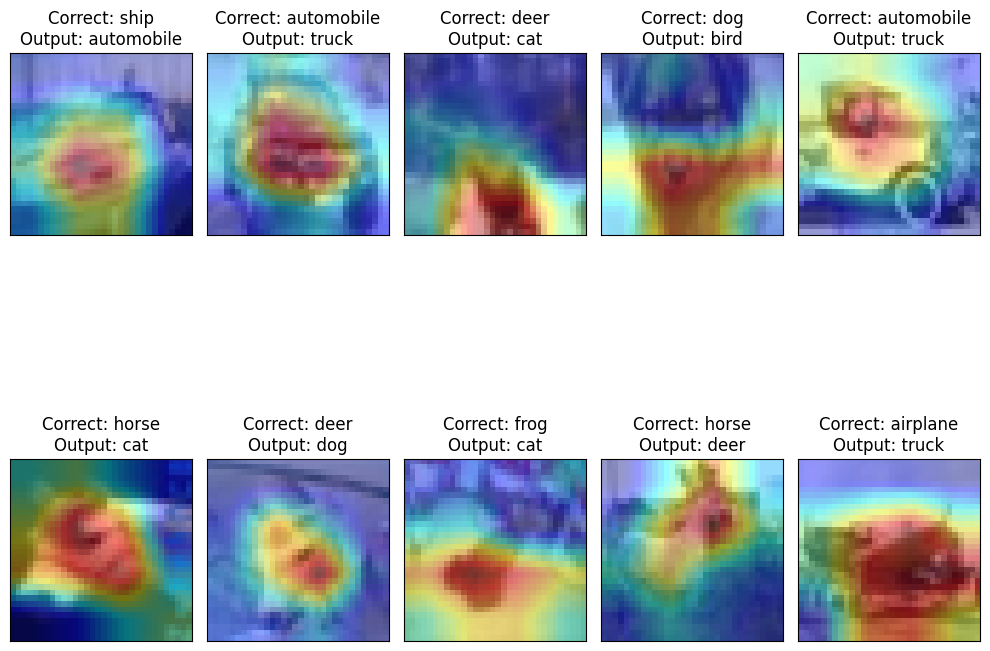

In [ ]:
testdata = test_loader.dataset
target_layer = [model.model.layer4[-1]]
# Denormalize the data using test mean and std deviation
inv_normalize = transforms.Normalize(
    mean=[-0.50/0.23, -0.50/0.23, -0.50/0.23],
    std=[1/0.23, 1/0.23, 1/0.23]
)
display_gradcam_output(misclassified_data,classes,inv_normalize,model,target_layer)

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 62.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.4/298.4 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 9.2 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.1-py3-none-any.whl size=5579 sha256=bcf3592dbb5340659e913eff9fa65032df234db063a7111638e833d6d97e4b7d
  Stored in directory: /root/.cache/pip/wheels/01/a6/d1/1c0828c304a4283b2c1639a09ad86f83d7c487ef34c6b4a1bf
Successfully built ffmpy


In [ ]:
import numpy as np
import gradio as gr
from PIL import Image
from pytorch_grad_cam import GradCAM

def inference(input_img, transparency):
    transform = transforms.ToTensor()
    input_img = transform(input_img)
    input_img = input_img.to(device)
    input_img = input_img.unsqueeze(0)
    outputs = model(input_img)
    _, prediction = torch.max(outputs, 1)
    target_layers = [model.model.layer2[-2]]
    cam = GradCAM(model=model, target_layers=target_layers, use_cuda=True)
    grayscale_cam = cam(input_tensor=input_img, targets=None)
    grayscale_cam = grayscale_cam[0, :]
    img = input_img.squeeze(0).to('cpu')
    img = inv_normalize(img)
    rgb_img = np.transpose(img, (1, 2, 0))
    rgb_img = rgb_img.numpy()
    visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True, image_weight=transparency)
    return classes[prediction[0].item()], visualization

demo = gr.Interface(inference, [gr.Image(shape=(32, 32)), gr.Slider(0, 1)], ["text", gr.Image(shape=(32, 32)).style(width=128, height=128)])
demo.launch(debug=True)

<ipython-input-21-f8f916039502>:24: GradioDeprecationWarning: The `style` method is deprecated. Please set these arguments in the constructor instead.
  demo = gr.Interface(inference, [gr.Image(shape=(32, 32)), gr.Slider(0, 1)], ["text", gr.Image(shape=(32, 32)).style(width=128, height=128)])


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/gradio/components/button.py:89: UserWarning: Using the update method is deprecated. Simply return a new object instead, e.g. `return gr.Button(...)` instead of `return gr.Button.update(...)`.
  warnings.warn(
